In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import numpy as np

In [2]:
import os

In [4]:
from google.colab import drive   # 코랩 드라이브와 연동
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
data_path = '/content/drive/MyDrive/gachon4-2/deeplearning/week2/car+evaluation'

In [109]:
df = pd.DataFrame(pd.read_csv(os.path.join(data_path,"car_evaluation.csv")))

In [110]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [112]:
print("vhigh value: ",np.unique(df['vhigh'].values))
print("vhigh.1 value: ",np.unique(df['vhigh.1'].values))
print("2 value: ",np.unique(df['2'].values))
print("2.1 value: ",np.unique(df['2.1'].values))
print("small value: ",np.unique(df['small'].values))
print("low value: ",np.unique(df['low'].values))
print("label class: ",np.unique(df['unacc'].values))

vhigh value:  ['high' 'low' 'med' 'vhigh']
vhigh.1 value:  ['high' 'low' 'med' 'vhigh']
2 value:  ['2' '3' '4' '5more']
2.1 value:  ['2' '4' 'more']
small value:  ['big' 'med' 'small']
low value:  ['high' 'low' 'med']
label class:  ['acc' 'good' 'unacc' 'vgood']


In [113]:
df[df['vhigh']=='low']['vhigh']

1295    low
1296    low
1297    low
1298    low
1299    low
       ... 
1722    low
1723    low
1724    low
1725    low
1726    low
Name: vhigh, Length: 432, dtype: object

In [118]:
df.loc[df['vhigh'] == 'low', 'vhigh'] = 0
df.loc[df['vhigh'] == 'med', 'vhigh'] = 1
df.loc[df['vhigh'] == 'high', 'vhigh'] = 2
df.loc[df['vhigh'] == 'vhigh', 'vhigh'] = 3

df.loc[df['vhigh.1'] == 'low', 'vhigh.1'] = 0
df.loc[df['vhigh.1'] == 'med', 'vhigh.1'] = 1
df.loc[df['vhigh.1'] == 'high', 'vhigh.1'] = 2
df.loc[df['vhigh.1'] == 'vhigh', 'vhigh.1'] = 3

df.loc[df['2'] == '2', '2'] = 0
df.loc[df['2'] == '3', '2'] = 1
df.loc[df['2'] == '4', '2'] = 2
df.loc[df['2'] == '5more', '2'] = 2

df.loc[df['2.1'] == '2', '2.1'] = 0
df.loc[df['2.1'] == '4', '2.1'] = 1
df.loc[df['2.1'] == 'more', '2.1'] = 2

df.loc[df['small'] == 'small', 'small'] = 0
df.loc[df['small'] == 'med', 'small'] = 1
df.loc[df['small'] == 'big', 'small'] = 2

df.loc[df['low'] == 'low', 'low'] = 0
df.loc[df['low'] == 'med', 'low'] = 1
df.loc[df['low'] == 'high', 'low'] = 2

df.loc[df['unacc'] == 'acc', 'unacc'] = 0
df.loc[df['unacc'] == 'unacc', 'unacc'] = 1
df.loc[df['unacc'] == 'good', 'unacc'] = 2
df.loc[df['unacc'] == 'vgood', 'unacc'] = 3

In [119]:
df.head

<bound method NDFrame.head of      vhigh vhigh.1  2 2.1 small low unacc
0        3       3  0   0     0   1     1
1        3       3  0   0     0   2     1
2        3       3  0   0     1   0     1
3        3       3  0   0     1   1     1
4        3       3  0   0     1   2     1
...    ...     ... ..  ..   ...  ..   ...
1722     0       0  2   2     1   1     2
1723     0       0  2   2     1   2     3
1724     0       0  2   2     2   0     1
1725     0       0  2   2     2   1     2
1726     0       0  2   2     2   2     3

[1727 rows x 7 columns]>

In [120]:
X = df[['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low']].values
Y = df['unacc'].values

In [121]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [122]:
# One-hot encoding of y_train labels (only execute once!)
from keras.utils import to_categorical
Y2 = to_categorical(Y, num_classes= 4)
print('New y_train shape: ', Y2.shape)

New y_train shape:  (1727, 4)


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, train_size=0.9, random_state=1, shuffle=True)

In [124]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1554, 6) (1554, 4)
(173, 6) (173, 4)


In [125]:
# define model params
input_shape = X_train.shape[1]
output_shape = Y_train.shape[1]
nodes = np.ceil(2 * input_shape / 3 + output_shape).astype(int)
batch_size = np.ceil(len(X_train) / 128).astype(int)

In [127]:

from keras.layers import Dense, Dropout, Input
from keras import optimizers, Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

def DNN(input_size=(6,)):
  inputs=Input(input_size)

  dense1 = Dense(batch_size, activation='relu')(inputs)
  dense2 = Dense(nodes, activation='relu')(dense1)
  drop1 = Dropout(0.5)(dense2)

  outputs = Dense(4, activation='softmax')(drop1)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model



In [128]:

DNN_model = DNN()
DNN_model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_15 (Dense)            (None, 13)                91        
                                                                 
 dense_16 (Dense)            (None, 8)                 112       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
Total params: 239 (956.00 Byte)
Trainable params: 239 (956.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:


# 모델 컴파일 하기
PATH= "/content/drive/MyDrive/gachon4-2/deeplearning/week2/"
model_checkpoint = ModelCheckpoint(filepath =  os.path.join(PATH,"model.h5"), monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20)

In [130]:
# 모델 학습
hist = DNN_model.fit(
                  X_train, Y_train,                        # 입력 / 라벨
                  epochs = 100, batch_size = 16,            # 학습 회수 / 학습 10번 후 오차 감소
                  validation_data=(X_test, Y_test),        # 검증 데이터
                  callbacks = [model_checkpoint, early_stopping], # 저장 및 모니터링
                  shuffle=True
                 )



Epoch 1/100
90/98 [==========================>...] - ETA: 0s - loss: 1.3052 - accuracy: 0.5708
Epoch 1: val_loss improved from inf to 1.00365, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
98/98 [==============================] - 2s 9ms/step - loss: 1.2965 - accuracy: 0.5792 - val_loss: 1.0036 - val_accuracy: 0.7283
Epoch 2/100
48/98 [=============>................] - ETA: 0s - loss: 1.0882 - accuracy: 0.6823

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/98 [======================>.......] - ETA: 0s - loss: 1.0615 - accuracy: 0.6817
Epoch 2: val_loss improved from 1.00365 to 0.80077, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
98/98 [==============================] - 0s 3ms/step - loss: 1.0482 - accuracy: 0.6853 - val_loss: 0.8008 - val_accuracy: 0.7341
Epoch 3/100
83/98 [========================>.....] - ETA: 0s - loss: 0.9027 - accuracy: 0.6935
Epoch 3: val_loss improved from 0.80077 to 0.65948, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
98/98 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.6931 - val_loss: 0.6595 - val_accuracy: 0.7341
Epoch 4/100
86/98 [=========================>....] - ETA: 0s - loss: 0.7821 - accuracy: 0.6940
Epoch 4: val_loss improved from 0.65948 to 0.54872, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
98/98 [==============================] - 0s 3ms/step - loss: 0.7667 - accuracy: 0.

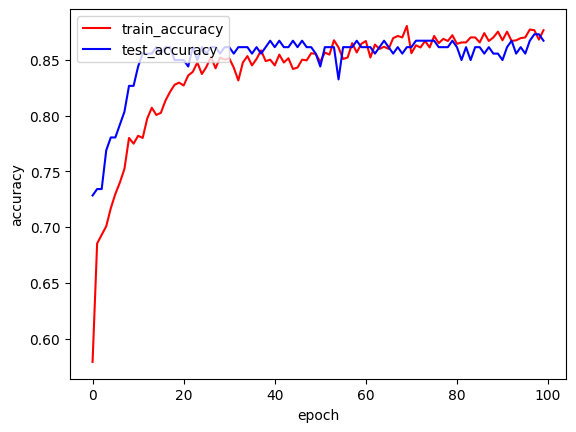

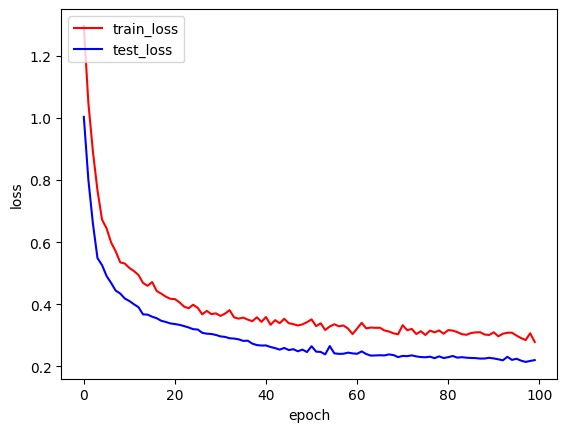

In [131]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], 'r', label = 'train_accuracy')
plt.plot(hist.history['val_accuracy'], 'b', label = 'test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(hist.history['loss'], 'r', label = 'train_loss')
plt.plot(hist.history['val_loss'], 'b', label = 'test_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [132]:
# 모델 평가
DNN_model.evaluate(X_test, Y_test)

# 테스트 데이터 입력하여 예측값 구하기
prediction = DNN_model.predict(X_test)

# 3. perform evaluation on test set
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluation for multi class classification
y_label = np.argmax(Y_test,1)
y_pred = np.argmax(prediction,1)

print(classification_report(y_label, y_pred))
print('Accuracy Score:', metrics.accuracy_score(y_label, y_pred))

cm = confusion_matrix(y_label, y_pred)
print(cm)


6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.57      0.97      0.72        30
           1       0.99      0.94      0.97       127
           2       0.00      0.00      0.00         6
           3       1.00      0.10      0.18        10

    accuracy                           0.87       173
   macro avg       0.64      0.50      0.47       173
weighted avg       0.88      0.87      0.85       173

Accuracy Score: 0.8670520231213873
[[ 29   1   0   0]
 [  7 120   0   0]
 [  6   0   0   0]
 [  9   0   0   1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
